# DLCV Assignment 1

**Due Date: 17/02/2023 11:59PM IST**

**Name: Ankit Kumar Sinha**

**Sr. No.: 21289**


In this assignment, we will cover the following topics:

1) Training a simple Linear Model 

2) Implementing Modules with Backprop functionality

3) Implementing Convolution Module on Numpy


It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like caffe,pytorch etc), which directly give functions for these steps, are to be used. 

# Training a simple Linear Model

In this section, you will write the code to train a Linear Model. The goal is to classify an input $X_i$ of size $n$ into one of $m$ classes. For this, you need to consider the following:

1)  **Weight Matrix** $W_{n\times m}$: The Weights are multipled with the input $X_i$ (vector of size $n$), to find $m$ scores $S_m$ for the $m$ classes.

2)  **The Loss function**:   
  * The Cross Entropy Loss: By interpreting the scores as unnormalized log probabilities for each class, this loss tries to measure dissatisfaction with the scores in terms of the log probability of the right class:

$$
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}
$$

where $f_{ y_i }$ is the $y_i$-th element of the output of $W^T  X_i$

3) **A Regularization term**: In addition to the loss, you need a Regularization term to lead to a more distributed (in case of $L_2$) or sparse (in case of $L_1$) learning of the weights. For example, with $L_2$ regularization, the loss has the following additional term:

$$
R(W) = \sum_k\sum_l W_{k,l}^2  
$$

Thus the total loss has the form:
$$
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$$

4) **An Optimization Procedure**: This refers to the process which tweaks the weight Matrix $W_{n\times m}$ to reduce the loss function $L$. In our case, this refers to Mini-batch Gradient Descent algorithm. We adjust the weights $W_{n\times m}$, based on the gradient of the loss $L$ w.r.t. $W_{n\times m}$. This leads to:
$$
W_{t+1} = W_{t} - \alpha \frac{\partial L}{\partial W},
$$
where $\alpha$ is the learning rate. Additionally, with "mini-batch" gradient descent, instead of finding loss over the whole dataset, we use a small sample $B$ of the training data to make each learning step. Hence,
$$
W_{t+1} = W_{t} - \alpha \frac{\partial \sum_{i \in B}{L_{x_i}}}{\partial W},
$$
where $|B|$ is the batch size.

# Question 1

Train a **Single-Layer Classifier** for the MNIST dataset. 
* Use Softmax-Loss.
* Maintain a train-validation split of the original training set for finding the right value of $\lambda$ for the regularization, and to check for over-fitting.
* Finally, evaluate the classification performance on the test-set.


In [135]:
#Loading Mnist Data

import idx2numpy
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import train_test_split


%matplotlib inline



training_images_filepath = "/content/drive/MyDrive/MNSIT Dataset/train-images.idx3-ubyte"
training_labels_filepath = "/content/drive/MyDrive/MNSIT Dataset/train-labels.idx1-ubyte"
test_images_filepath = "/content/drive/MyDrive/MNSIT Dataset/t10k-images.idx3-ubyte"
test_labels_filepath = "/content/drive/MyDrive/MNSIT Dataset/t10k-labels.idx1-ubyte"



X_train, y_train = loadlocal_mnist( training_images_filepath, training_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)


X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)


training_x, X_val,training_y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [136]:
## Load The Mnist data:
# Download data from http://yann.lecun.com/exdb/mnist/
# load the data.

# maintain a train-val split

# Now, write a generator that yields (random) mini-batches of the input data
# Do not use same set of mini-batches for different epochs




    
def get_minibatch(training_x=training_x, training_y=training_y,batch_size=10):
    ## Read about Python generators if required.

    """generator function returns generator objects which are iterables using for in or next we can call the next objext"""

    ## WRITE CODE HERE
    m = training_y.shape[0]
    permutation = list(np.random.permutation(m))

    training_x = training_x[permutation,:]
    training_y = training_y[permutation]

    #minibatch = []
    #batch_size = 10
    number_of_batch = int(m/batch_size)  #batch_size_was_5

    for i in range(number_of_batch):
      mini_x = training_x[i*batch_size:(i+1)*batch_size]
      mini_y = training_y[i*batch_size:(i+1)*batch_size]
      #minibatch.append((mini_x,mini_y))

      yield mini_x,mini_y

In [137]:
# Define the class for a Single Layer Classifier
class Single_layer_classifier():
  """input = 28""" 
    
  def __init__(self, input_size, output_size):
        
        ## WRITE CODE HERE

        self.weight_matrix = np.random.normal(0,1e-3,size=(input_size,output_size))
        
        # Give the instance a weight matrix, initialized randomly
        # One possible strategy for a good initialization is Normal (0, σ) where σ = 1e-3.
        # Try experimenting with different values of σ.
        
    # Define the forward function
  def forward(self, input_x):
      """ input_x is image
      """
        
        # get the scores
      input_x = input_x.flatten()
      input_x = np.reshape(input_x,(input_x.shape[0],1))
      self.input_x = input_x/255
      scores = self.weight_matrix.T@input_x

        ## WRITE CODE HERE
        
      return scores
    
    # Similarly a backward function
    # we define 2 backward functions (as Loss = L_data + L_reg, grad(Loss) = grad(L1) + grad(L2))
    
  def backward_Ldata(self,grad_from_loss):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the loss w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE

        grad_matrix = np.dot(self.input_x,grad_from_loss.T)

        return grad_matrix
        
  def backward_Lreg(self):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the regularization-term
        # w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE
        grad_matrix = 2*self.weight_matrix
        
        return grad_matrix

In [138]:
# Implement the Softmax loss function
def loss_function(input_y,scores):

    ## WRITE CODE HERE

    loss = np.exp(scores.copy())
    loss = loss/(loss.sum(0))   
    loss = -np.log(loss[input_y])

    return loss


def loss_backward(input_y,scores):
    # This part deals with the gradient of the loss w.r.t the output of network
    # for example, in case of softmax loss(-log(q_c)), this part gives grad(loss) w.r.t. q_c
    # pass this to backward_ldata

    ## WRITE CODE HERE
    y = np.zeros((10,1))
    y[input_y][0] = -1
    loss = np.exp(scores.copy())
    loss = loss/(loss.sum(0)) 

    grad_from_loss = loss + y



    return grad_from_loss
        

### Create utility functions for calculating training and validation accuracy

In [139]:
# WRITE CODE HERE

model  = Single_layer_classifier(28*28,10)

In [140]:
# Finally the trainer:
# Make an instance of Single_layer_classifier
# Train for t epochs:
###  Train on the train-set obtained from train-validation split
###  Use the mini-batch generator to get each mini-batch


def model_train(num_batch,epochs,lr,lamb_):
      count =0
      training_loss = []
      training_accuracy = []
      for epoch in range(epochs):
        total_epoch_loss = 0
        epoch_corrects = 0
        epoch_total_sample = 0
        
          
        minibatch_generator = get_minibatch(batch_size=num_batch)

        for input_x , input_y in (minibatch_generator):
            
            ## Write code here for each iteration of training

            #Forward pass
            loss_back = 0
            accuracy = 0
            
            for i in range(len(input_x)):
              x = input_x[i]
              y= input_y[i]
              scores = model.forward(x) 
              scores = scores/(max(scores))

              if (np.argmax(scores)==y):
                epoch_corrects += 1
              epoch_total_sample += 1

              total_epoch_loss += loss_function(y,scores)
              loss_back += loss_backward(y,scores)

              # update metrics

              
            # Backward pass

            loss_back = loss_back/len(input_x)
            backward_data_weight = model.backward_Ldata(loss_back)
            backward_regularization = model.backward_Lreg()

            lr = 0.5
            lamb_ = 0.0001





            
            # Update weights
            model.weight_matrix  -=  ((backward_data_weight) * lr +  lamb_ * backward_regularization)

            
            # Log the training loss value and training accuracy 
            count += 1

        print("The training loss value is %.4f and training accuracy is %.4f, count is %f" %(total_epoch_loss/epoch_total_sample,epoch_corrects/epoch_total_sample,count))
        training_loss.append(total_epoch_loss/epoch_total_sample)
        training_accuracy.append(epoch_corrects/epoch_total_sample)

      return training_accuracy,training_loss


training_accuracy,training_loss=model_train(20,10,0.5,0.001)  

The training loss value is 1.7138 and training accuracy is 0.5945, count is 2400.000000
The training loss value is 1.6174 and training accuracy is 0.6869, count is 4800.000000
The training loss value is 1.5947 and training accuracy is 0.7077, count is 7200.000000
The training loss value is 1.5897 and training accuracy is 0.7098, count is 9600.000000
The training loss value is 1.5946 and training accuracy is 0.7054, count is 12000.000000
The training loss value is 1.5882 and training accuracy is 0.7152, count is 14400.000000
The training loss value is 1.5881 and training accuracy is 0.7123, count is 16800.000000
The training loss value is 1.5856 and training accuracy is 0.7145, count is 19200.000000
The training loss value is 1.5782 and training accuracy is 0.7261, count is 21600.000000
The training loss value is 1.5782 and training accuracy is 0.7279, count is 24000.000000


### Plot the training loss and training accuracy plot

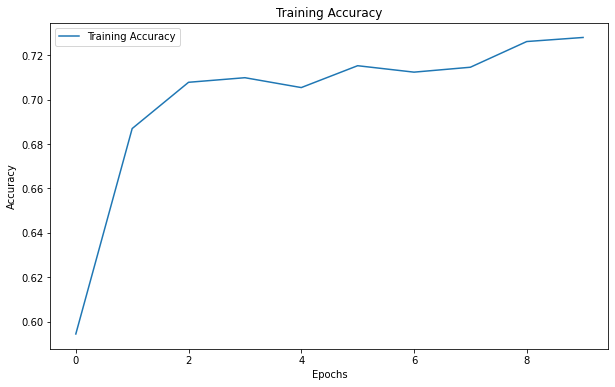

Text(0.5, 1.0, 'Training Loss')

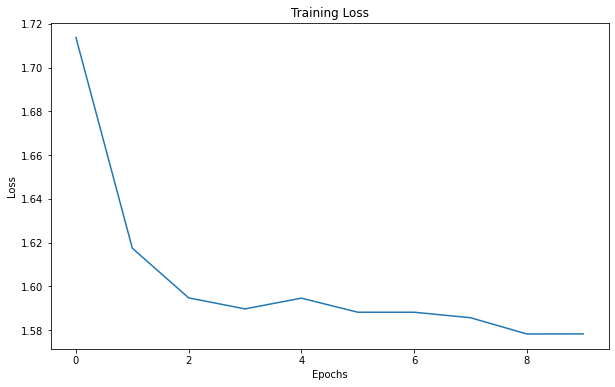

In [141]:
# WRITE CODE HERE


import matplotlib.pyplot as plt


# plot the training loss and accuracy
plt.subplots(figsize=(10, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()


plt.subplots(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')


In [142]:
### Find the accuracy on the validation set
def test_model(model,X_val,y_val):
    minibatch_generator = get_minibatch(X_val,y_val)
    corrects = 0
    total_sample =0
    for input_x , input_y in (minibatch_generator):
      for i in range(len(input_x)):
        x = input_x[i]
        y = input_y[i]
        scores = model.forward(x)
        predicted = np.argmax(scores)
        if (predicted == y):
          corrects += 1
        total_sample += 1
        test_accuracy = corrects/total_sample
    print("The testing accuracy is %.4f" %(test_accuracy))
    return test_accuracy

test_accuracy = test_model(model,X_val,y_val)


The testing accuracy is 0.7133


In [ ]:
# WRITE CODE HERE

The training loss value is 1.5983 and training accuracy is 0.7094, count is 9600.000000
The training loss value is 1.6432 and training accuracy is 0.6599, count is 4800.000000
The training loss value is 1.7236 and training accuracy is 0.5813, count is 2400.000000
The training loss value is 1.5933 and training accuracy is 0.7194, count is 9600.000000
The training loss value is 1.6284 and training accuracy is 0.6834, count is 4800.000000
The training loss value is 1.7190 and training accuracy is 0.5770, count is 2400.000000
The training loss value is 1.6007 and training accuracy is 0.7029, count is 9600.000000
The training loss value is 1.6319 and training accuracy is 0.6703, count is 4800.000000
The training loss value is 1.7464 and training accuracy is 0.5669, count is 2400.000000


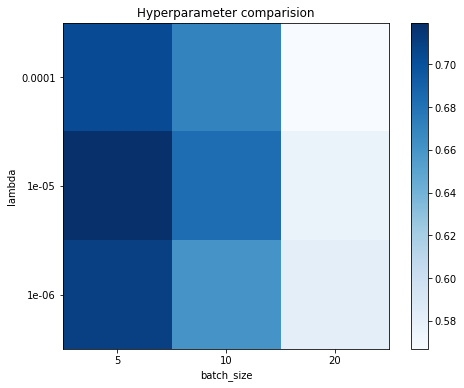

In [144]:
# The next step is to find the optimal value for lambda, number of epochs, learning rate and batch size. 
# CHOSE ANY TWO from the above mentioned to tune.
# Create plot and table to show the effect of the hparams.

lambda_ = [0.0001,0.00001,0.000001]
batch_size = [5,10,20]

results = pd.DataFrame(columns=['lambda_', 'batch_size', 'train_loss', 'train_acc'])

for l in lambda_:
  for b in batch_size:
    epochs =1
    model = Single_layer_classifier(28*28, 10)
    training_accuracy,training_loss = model_train(b,epochs,0.5,l)
    results = results.append({'lambda_': l, 'batch_size': b, 'train_loss': training_loss[-1].item(), 'train_acc': training_accuracy[-1]}, ignore_index=True)





table=pd.pivot_table(results,values='train_acc',columns='batch_size',index='lambda_')


plt.figure(figsize=(8, 6))
plt.imshow(table,cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(len(batch_size)),batch_size )
plt.yticks(np.arange(len(lambda_)),lambda_ )
plt.xlabel('batch_size')
plt.ylabel('lambda')
plt.title("Hyperparameter comparision")
plt.colorbar()
plt.show()


In [ ]:
### Report final performance on MNIST test set

In [159]:
# WRITE CODE HERE

training_accuracy,training_loss = model_train(20,5,0.5,0.0000001) 

test_accuracy=test_model(model,X_test,y_test)

TypeError: ignored

### Find the best performing class and the worst performing class

In [ ]:
# WRITE CODE HERE





# Training a Linear Classifier on MNIST from scikit-learn

In this section you have to train a linear classifier from the scikit-learn library and compare its results against your implementation.
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [92]:
    # WRITE CODE HERE 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model_x =X_train[:20000].reshape(-1,X_train.shape[1]*X_train.shape[2])
model_y =X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])


clf = LogisticRegression()
clf.fit(model_x, y_train[:20000])

y_pred = clf.predict(model_y)


accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %f",accuracy)



Accuracy: %f 0.9131


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Compare the training and test accuracies for the your implementation and linear classifier from scikit-learn

In [95]:
    # WRITE CODE HERE

print("The training accuracy : %f and test accuracy : %f of my implementation"%(training_accuracy[-1],test_accuracy))
print("The test accuracy : %f of scikit-learn linear classifier"%(accuracy))

The training accuracy : 0.714854 and test accuracy : 0.722500 of my implementation
The test accuracy : 0.913100 of scikit-learn linear classifier


### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE



# Implementing Backpropagation

Now that you have had some experience with single layer networks, we can proceed to more complex architectures. But first we need to completely understand and implement backpropagation.

## Backpropagation:

Simply put, a way of computing gradients of expressions through repeated application of chain rule. If
$$
L = f (g (h (\textbf{x})))
$$
then, by the chain rule we have:
$$
\frac{\partial L}{\partial \textbf{x}} = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial \textbf{x}} 
$$

** Look into the class Lecture for more detail **



# Question 2 : Scalar Backpropagation

Evaluate the gradient of the following function w.r.t. the input:

$$ f(x,y,z) =  log(\sigma(\frac{cos(\pi \times x)+sin(\pi \times y/2)}{tanh(z^2)}))$$
where $\sigma$ is the sigmoid function. Find gradient for the following inputs:
  * $(x,y,z)$ =  (2,4,1)
  * $(x,y,z)$ =  (9,14,3)
  * $(x,y,z)$ =  (128,42,666)
  * $(x,y,z)$ =  (52,14,28)

      

In [96]:
# To solve this problem, construct the computational graph
# Write a class with forward and backward functions, for each node if you like
# For eg:
import numpy as np

class Sigmoid():
    def __init__(self,x):
      self.x = x
      self.sigmoid = None
        
    def forward(self):
      self.sigmoid =  1/(1+np.exp(-self.x))
      return self.sigmoid
      
        # save values useful for backpropagation
    def backward(self,dy):
      dx = dy*self.sigmoid*(1-self.sigmoid)
      return dx


class logf_():
    def __init__(self,x):
      self.x = x      

    def forward(self):
      self.logf =  np.log(self.x)
      return self.logf
      
        # save values useful for backpropagation
    def backward(self,dy):
      dx = dy*(1/self.x)
      return dx


class division_():
  def __init__(self,x,y):
    self.x = x
    self.y = y


  def forward(self):
    self.divf =  self.x/self.y
    return self.divf



     # save values useful for backpropagation
  def backward(self,dz):
      dx = dz*1/(self.y)
      dy = -dz*(self.x/(self.y)**2)

      return dx,dy


class addition_():
  def __init__(self,x,y):
    self.x = x
    self.y = y


  def forward(self):
    self.addf =  self.x+self.y
    return self.addf



     # save values useful for backpropagation
  def backward(self,dz):
      dx = dz
      dy = dz
      return dx,dy

class cos_():
  def __init__(self,x):
    self.x = x
    self.cosf =None


  def forward(self):
    self.cosf =  np.cos(self.x)
    return self.cosf



     # save values useful for backpropagation
  def backward(self,dz):
      dx = -dz*(np.sin(self.x))
      return dx

class sin_():
  def __init__(self,x):
    self.x = x


  def forward(self):
    self.sinf =  np.sin(self.x)
    return self.sinf

     # save values useful for backpropagation
  def backward(self,dz):
      dx = dz*(np.cos(self.x))
      return dx


class tanh_():
  def __init__(self,x):
    self.x = x
    self.tanhf=None

  def forward(self):
    self.tanhf =  np.tanh(self.x)
    return self.tanhf

     # save values useful for backpropagation
  def backward(self,dz):
      dx = dz*1/(np.cosh(self.x))**2
      return dx



class xsqr():
  def __init__(self,x):
    self.x = x

  def forward(self):
    self.xsqf =  (self.x)**2
    return self.xsqf



     # save values useful for backpropagation
  def backward(self,dz):
      dx = dz*2*(self.x)
      return dx   
        
# CAUTION: Carefully treat the input and output dimension variation. At worst, handle them with if statements.

In [111]:
# Now write the class func
# which constructs the graph (all operators), forward and backward functions.

class Func():
    def __init__(self,x,y,z):
        self.x = x 
        self.y = y
        self.z = z
        pi = np.pi

        self.cos = cos_(pi*self.x)
        self.sin = sin_(pi/2*self.y)
        self.xsq = xsqr(self.z)
        self.tanh = tanh_(self.xsq.forward())
        self.add = addition_(self.cos.forward(), self.sin.forward())
        self.div = division_(self.add.forward(), self.tanh.forward())
        self.sig = Sigmoid(self.div.forward())
        self.logf = logf_(self.sig.forward())

      

        # construct the graph here
        # assign the instances of function modules to self.var
        
    def forward(self):
        output= self.logf.forward()  
        return output
    
    def backward(self,dout=1):
        # Use the saved outputs of each module, and backward() function calls
        dlogf = self.logf.backward(dout)
        dsigf = self.sig.backward(dlogf)
        daddf, dtanhf = self.div.backward(dsigf)
        dcosf, dsinf = self.add.backward(daddf)
        dxsqf = self.tanh.backward(dtanhf)
        grad_z = self.xsq.backward(dxsqf)
        grad_x = self.cos.backward(dcosf * np.pi) 
        grad_y = self.sin.backward(dsinf * np.pi/2)

        return [grad_x,grad_y,grad_z]



x=Func(2,4,1)
x.forward()
x=x.backward()
print("The gradient of the function at (2,1,4) is :")
print(*x, sep = ", ") 



x=Func(9,14,3)
x.forward()
x=x.backward()
print("The gradient of the function at (9,14,3) is :")
print(*x, sep = ", ") 


x=Func(128,42,666)
x.forward()
x=x.backward()
print("The gradient of the function at (128,42,666) is :")
print(*x, sep = ", ") 


x=Func(52,14,28)
x.forward()
x=x.backward()
print("The gradient of the function at (52,14,28) is :")
print(*x, sep = ", ") 


# $(x,y,z)$ =  (2,4,1)
#   * $(x,y,z)$ =  (9,14,3)
#   * $(x,y,z)$ =  (128,42,666)
#   * $(x,y,z)$ =  (52,14,28)
    

The gradient of the function at (2,1,4) is :
2.1417102890343505e-16, 0.43720979194276516, -0.30697227565888824
The gradient of the function at (9,14,3) is :
-2.5313688314302283e-15, -1.1483441743695977, 2.672161866020151e-07
The gradient of the function at (128,42,666) is :
1.3244281103803985e-14, -0.42245219681098717, -0.0
The gradient of the function at (52,14,28) is :
-6.6263243875773434e-15, -0.42245219681098645, -0.0


<ipython-input-96-b3f0ef85684e>:116: RuntimeWarning: overflow encountered in cosh
  dx = dz*1/(np.cosh(self.x))**2


## Question 3 : Modular Vector Backpropagation

* Construct a Linear Layer module, implementing the forward and backward functions for arbitrary sizes.
* Construct a ReLU module, implementing the forward and backward functions for arbitrary sizes.
* Create a 2 layer MLP using the constructed modules.

* Modifying the functions built in Question 1 , train this two layer MLP for the same data set, MNIST, with the same train-val split.

In [112]:
# Class for Linear Layer (If you're stuck, you can refer to code of PyTorch/Tensorflow packages) 

class Linearlayer():
  def __init__(self,inputsize,outputsize):
    self.weights = np.random.normal(0,1e-3,size=(outputsize,inputsize))
    self.bias = np.random.normal(0,1e-3,size= (outputsize,1))


  def forward(self,x):
    
    #x = np.reshape(x,(x.shape[0],1))
    self.x = x/255
    z = np.dot(self.weights,x)+self.bias
    return z

  def backward(self,dz):
    m = self.x.shape[1]
    self.dw = np.dot(dz, self.x.T)/m
    self.db = np.sum(dz, axis=1)/m
    self.db=self.db.reshape(self.db.shape[0],1)
    dx = np.dot(self.weights.T, dz)
    return dx

  def update_params(self, learning_rate):
      self.weights = self.weights - learning_rate * self.dw
      self.bias = self.bias - learning_rate * self.db




In [113]:
# Class for ReLU

class ReLu():
  def __init__(self):
    self.x = None
    self.dr = None

  def forward(self,x):
    self.x =x
    self.x[self.x<0]=0
    return x

  def backward(self,dz):
    self.dr = dz*(self.x >0)
    return self.dr



class softmaxLoss():
  def __init__(self):
    pass

  def forward(self,x,y):
    self.N = x.shape[1]
    self.y = y

    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    self.p = exp_x / np.sum(exp_x, axis=0, keepdims=True)
    loss = -np.sum(np.log(self.p[y, range(self.N)])) / self.N
    return loss


  def backward(self):
    dx = self.p.copy()

    dx[self.y, range(self.N)] -= 1
    dx /= self.N
    return dx

    


In [114]:
# Your 2 layer MLP 
model1 = Linearlayer(28*28,64)
model3 = ReLu()
model2 = Linearlayer(64,10)
model4 = softmaxLoss()


In [146]:
# Train the MLP

def model_train(lr,batch,epochs):
      sample = 0
      loss = 0 
      corrects = 0
      #epochs = 10
      training_accuracy = []
      training_loss = []
      for i in range(epochs):
        
        minibatch_generator = get_minibatch(batch_size=batch)
        for train1_x,train1_y in minibatch_generator:
              train1_x = train1_x.reshape((train1_x.shape[0], -1))
              train1_x = train1_x.T

              #Forward pass
              y=model1.forward(train1_x)
              y = model3.forward(y)
              # print("weights",model2.weights.shape)
              # print("y",y.shape)
              # print("bias",model2.bias.shape)
              y=model2.forward(y)
              
              loss += model4.forward(y,train1_y)*len(train1_x[1])
              # print(train1_y)
              # print(y)

              pred_labels = np.argmax(y, axis=0)

              accuracy = np.mean(pred_labels == train1_y)
              sample += len(train1_x[1])
              corrects += accuracy*(len(train1_x[1]))

              #backward pass
              z = model4.backward()
              z = model2.backward(z)
              z = model3.backward(z)
              z = model1.backward(z)


              #update parameters
              model2.update_params(lr)
              
              model1.update_params(lr)
        training_accuracy.append(corrects/sample)
        training_loss.append(loss/sample) 

        print("The accuracy %.4f and the loss %.4f, sample is %d "%(corrects/sample,loss/sample,sample))
      return training_accuracy,training_loss
      

training_accuracy,training_loss = model_train(0.1,20,10)

The accuracy 0.5643 and the loss 1.6318, sample is 48000 
The accuracy 0.7075 and the loss 1.1039, sample is 96000 
The accuracy 0.7672 and the loss 0.8748, sample is 144000 
The accuracy 0.7999 and the loss 0.7470, sample is 192000 
The accuracy 0.8208 and the loss 0.6647, sample is 240000 
The accuracy 0.8356 and the loss 0.6065, sample is 288000 
The accuracy 0.8470 and the loss 0.5626, sample is 336000 
The accuracy 0.8560 and the loss 0.5279, sample is 384000 
The accuracy 0.8635 and the loss 0.4994, sample is 432000 
The accuracy 0.8698 and the loss 0.4755, sample is 480000 


### Plot the training loss and training accuracy plot

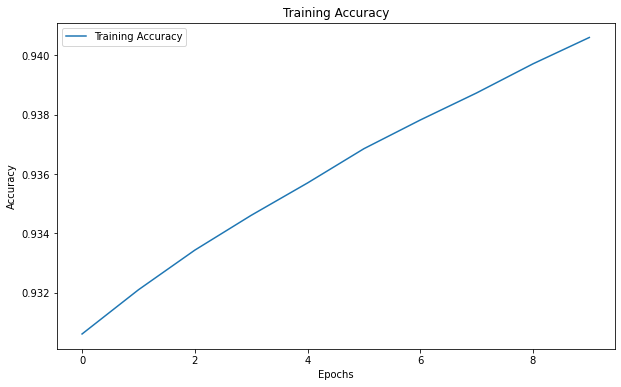

Text(0.5, 1.0, 'Training Loss')

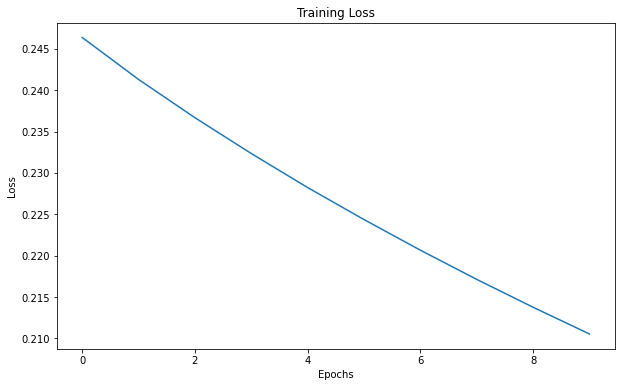

In [128]:
# Use the same utility functions defined in the previous question
# WRITE CODE HERE

plt.subplots(figsize=(10, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()


plt.subplots(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

In [ ]:
### Find the accuracy on the validation set

In [168]:
# WRITE CODE HERE

def test_model(X_val,y_val):
    minibatch_generator = get_minibatch(training_x=X_val,training_y=y_val)
    corrects = 0
    sample =0
    loss = 0
    for input_x , input_y in (minibatch_generator):
              input_x = input_x.reshape((input_x.shape[0], -1))
              input_x = input_x.T
              y=model1.forward(input_x)
              y = model3.forward(y)
              y=model2.forward(y)
              loss += model4.forward(y,input_y)*len(input_x[1])
              # print(train1_y)
              # print(y)

              pred_labels = np.argmax(y, axis=0)

              accuracy = np.mean(pred_labels == input_y)
              sample += len(input_x[1])
              corrects += accuracy*(len(input_x[1]))

      
    print("The accuracy %.4f and the loss %.4f, sample is %d "%(corrects/sample,loss/sample,sample))
    return 

test_model(X_val,y_val)


The accuracy 0.9657 and the loss 0.2789, sample is 12000 


The accuracy 0.8810 and the loss 0.4085, sample is 48000 
The accuracy 0.7931 and the loss 0.7532, sample is 48000 
The accuracy 0.5942 and the loss 1.5956, sample is 48000 
The accuracy 0.9125 and the loss 0.2818, sample is 48000 
The accuracy 0.8932 and the loss 0.3703, sample is 48000 
The accuracy 0.8225 and the loss 0.6678, sample is 48000 
The accuracy 0.9118 and the loss 0.2899, sample is 48000 
The accuracy 0.9009 and the loss 0.3278, sample is 48000 
The accuracy 0.8408 and the loss 0.5679, sample is 48000 


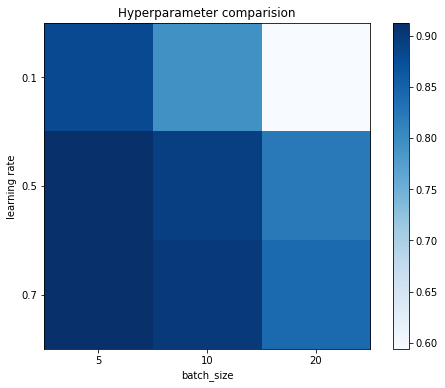

In [152]:
# Find the optimal value of learning rate and batch size. 
# Use the same tuning strategy as the previous question
# Create plot and table to show the effect of the hparams.



lr = [0.1,0.5,0.7]
batch_size = [5,10,20]

results = pd.DataFrame(columns=['learning_rate', 'batch_size', 'train_loss', 'train_acc'])

for l in lr:
  for b in batch_size:
    epochs =1
    model1 = Linearlayer(28*28,64)
    model3 = ReLu()
    model2 = Linearlayer(64,10)
    model4 = softmaxLoss()
    training_accuracy,training_loss = model_train(l,b,epochs)
    results = results.append({'learning_rate': l, 'batch_size': b, 'train_loss': training_loss[-1].item(), 'train_acc': training_accuracy[-1]}, ignore_index=True)





table=pd.pivot_table(results,values='train_acc',columns='batch_size',index='learning_rate')


plt.figure(figsize=(8, 6))
plt.imshow(table,cmap='Blues', interpolation='nearest')
plt.xticks(np.arange(len(batch_size)),batch_size )
plt.yticks(np.arange(len(table.index)),table.index )
plt.xlabel('batch_size')
plt.ylabel('learning rate')
plt.title("Hyperparameter comparision")
plt.colorbar()
plt.show()









In [ ]:
### Report final performance on MNIST test set

In [ ]:
# WRITE CODE HERE

model_train(0.5,5,10)

print(table)
test_model(X_test,y_test)

### Find the best performing class and the worst performing class

In [ ]:
# WRITE CODE HERE

### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE


# Implementing a Convolution Module with Numpy

* This topic will require you to implement the Convolution operation using Numpy.
* We will use the Module for tasks like Blurring.
* Finally, we implement Backpropagation for the convolution module.


## Question 4

* Implement a naive Convolution module, with basic functionalities: kernel_size, padding, stride and dilation
  
* Test out the convolution layer by using it to do gaussian blurring on 10 random images of CIFAR-10 dataset


In [ ]:
## Define a class Convolution Layer, which is initialized with the various required params:
class Convolution_Layer():
    
    def __init__(self,input_channels,output_channels , filter_size, bias=True, stride=1, padding=0, dilation=1):
        # For an untrained layer, set random initial filter weights
        self.filter_size = filter_size
        self.input_channels = input_channels
        self.output_channels = output_channels
        self.bias = bias
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        # Initialize random weights for the filter
        """filter_size (filter_channel,filter_height,filter_width)"""
        self.weights = np.random.randn(output_channels,input_channels,*filter_size)         
        if bias:
            self.bias_weights = np.random.randn(output_channels)





    def forward(self,input):
        # Input Proprocess(According to pad etc.) Input will be of size (Batch_size, in_channels, inp_height, inp_width)
        batch_size, in_channels, inp_height, inp_width = input.shape
        
        # Reminder: Save Input for backward-prop
        padded_input = np.pad(input, ((0, 0), (0, 0), (self.padding, self.padding), (self.padding, self.padding)))

        out_width = int((inp_width-self.filter_size[1]+2*self.padding)/self.stride +1 )
        out_height = int((inp_height-self.filter_size[0]+2*self.padding)/self.stride +1 )

        output = np.zeros((batch_size, self.output_channels, out_height, out_width))

        self.input = input



        # Simple Conv operation:
        for b_size in range(batch_size):
          for c_out in range(self.output_channels):
            for i in range(out_height):
              m = i*self.stride
              for j in range(out_width):
                
                n = j*self.stride 
                #print("m and n : %d %d"%(m,n))
                receptive_field = input[b_size,:,m:m+self.filter_size[0],n:n+self.filter_size[1]]
                output[b_size,c_out,i,j] = np.sum(receptive_field*self.weights[c_out]) 
                if self.bias:
                  output[b_size,c_out,i,j]+= self.bias_weights[c_out]

      


        # Loop over every location in inp_height * inp_width for the whole batch
        
        # Output will be of the size (Batch_size, out_channels, out_height, out_width)
        return output
    
    def backward(self, grad_of_output_size):
        
        # Naive Implementation
        # Speed is not a concern
        # Hint: gradients from each independant operation can be summed

        batch_size, out_channels, out_height, out_width = grad_of_output_size.shape

        grad_weights = np.zeros_like(self.weights)
        #grad_bias = np.zeros_like(self.bias)

        for b_size in range(batch_size):
          for c_out in range(out_channels):
            for i in range(out_height):
                m = i*self.stride
                for j in range(out_width):
                    n = j*self.stride 
                    receptive_field = self.input[b_size,:,m:m+self.filter_size[0],n:n+self.filter_size[1]]
                    #grad_bias[c_out] += grad_of_output_size[b_size, c_out, i, j]
                    grad_weights[c_out] += receptive_field*grad_of_output_size[b_size, c_out, i, j]

        grad_weights /= batch_size
        #grad_bias /= batch_size



        
        #  return gradient of the size of the weight kernel
        return grad_weights
    
    def set_weights(self, new_weights):
        ## Replace the set of weights with the given 'new_weights'
        self.weights = new_weights
        ## use this for setting weights for blurring, bilateral filtering etc. 
        return 0    

### Download CIFAR-10 images and load it in a numpy array (https://www.cs.toronto.edu/~kriz/cifar.html)



In [ ]:
# WRITE CODE HERE

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifr_dict = pickle.load(fo, encoding='bytes')
        cifr_data = cifr_dict[b'data']
        cifr_labels = cifr_dict[b'labels']
    return cifr_data,cifr_labels


train_image,train_label=unpickle("/content/drive/MyDrive/data_batch_1")

train_image = train_image.reshape(-1,3,32,32)

### Initialize a conv layer. Set weights for gaussian blurring (do not train the filter for this part). Visualise the filters using matplotlib


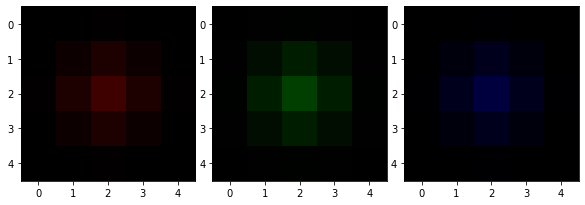

In [ ]:
# WRITE CODE HERE
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def gaussian_kernel(size, sigma=1):
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

weights = gaussian_kernel(2,0.8)

new_weights = np.zeros((3,3,5,5))
new_weights[0,0,:] =weights
new_weights[1,1,:] =weights
new_weights[2,2,:] =weights 


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(new_weights[i,:].transpose((1,2,0)))
    
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()




### Generate output for the first 5 images of the training set

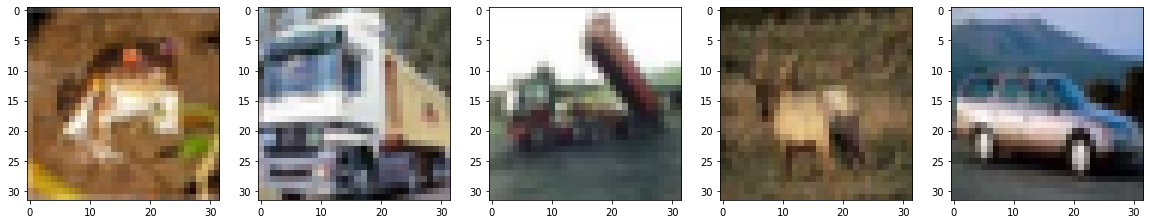

In [ ]:
# WRITE CODE HERE
batch_img = train_image[:5,:]


fig, axs = plt.subplots(1, 5, figsize=(20,20))

for i,ax in enumerate(axs.flat):
    img = train_image[i]
    axs[i].imshow(np.transpose(img,(1,2,0)))

### Use matplotlib to show the input and corresponding blurred output

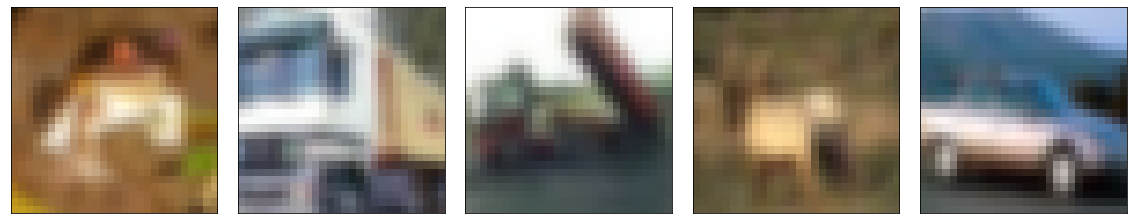

In [ ]:
# WRITE CODE HERE

model = Convolution_Layer(3,3,[5,5])


batch_img = train_image[:5,:]

model.set_weights(new_weights)

x = model.forward(batch_img)

x = np.transpose(x, (0, 2, 3, 1))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    # Plot image on the current subplot
    #np.abs(x[i]/np.abs(x[i].max()))
    ax.imshow(np.abs(x[i]/np.abs(x[i]).max()))
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

## Question 5
<br>
Now we will use this module for training a simple Convolution Layer using CIFAR-10 images. 

* The goal is to learn a set of weights, by using the backpropagation function created. To test the backpropagation, instead of training a whole network, we will train only a single layer.
  * Instantiate a Convolution  layer $C_0$ with 20 filters, each with size 5$\times$5 (RGB image, so 3 input channels). Load the given numpy array of size (20,3,5,5), which represents the weights of a convolution layer. Set the given values as the filter weights for $C_0$. Take 100 CIFAR-10 images. Save the output of these 100 images generated from this Convolution layer $C_0$. 
  
  * Now, initialize a new convolution layer $C$ with weight values sampled from uniform distribution [-1,1]. Use the $L_2$ loss between the output of this layer $C$ and the output generated in the previous step to learn the filter weights of $C_0$.


In [ ]:
## Load filter weights from given numpy array "C0_weights.npy".
## Init a conv layer C_0 with these given weights

## For all images get output. Store in numpy array.


input_img = train_image[:100,:]
input_img = input_img/255

C0 = Convolution_Layer(3,20,[5,5],bias=False)
C0_weights = np.load("/content/C0_weights.npy")
C0.weights = C0_weights
C0_output=C0.forward(input_img)


C = Convolution_Layer(3,20,[5,5],bias=False)
C.weights = np.random.uniform(-1,1,size=(20,3,5,5))
C_output = C.forward(input_img)



In [ ]:
# for part 2 we need to write a class for the  L2 loss
class L2_loss():
    def ___init__(self):
      pass
    
    def forward(self, C0_output,C_output):
        # Conv. output is of dimension (batchsize,channels,height,width)
        # calculate the L2 norm of (C0_output - C_output)

        self.diff = C_output - C0_output
        self.diff = self.diff/np.abs(self.diff).max() 
        loss = np.linalg.norm(C0_output.flatten()-C_output.flatten(),ord=2)
        
        return loss
    
    def backward(self,output_grad):
        # from the loss, and the conv. output, get the grad at each location
        # The grad is of the shape (batchsize,channels,height,width)

        grad = 2*output_grad *(self.diff)
        return grad

# Now Init a new conv layer C and a L2 loss layer

# Train the new conv-layer C using the L2 loss to learn C_0, i.e., the set of given weights.
# Use mini-batches if required



lr = 0.1
L2 = L2_loss()


# Print L2 dist between output from the new trained convolution layer C and the outputs generated from C_0.


iterations = 5

for i in range(iterations):
  for j in range(0,input_img.shape[0],10):
      C_output = C.forward(input_img[j:j+10,:])
      loss= L2.forward(C0_output[j:j+10,:],C_output)
      x = L2.backward(output_grad=1)
      x = C.backward(x)
      x = x/np.abs(x).max()


      C.weights = C.weights - lr*x
  print(f"Iteration {i}: loss = {loss}")



Iteration 0: loss = 401.56836829384287
Iteration 1: loss = 339.98256838688343
Iteration 2: loss = 312.5554460893538
Iteration 3: loss = 287.14845416354615
Iteration 4: loss = 265.262499726383
